In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from lda_implementation import lda_model

In [3]:
lda = lda_model()

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dt

In [4]:
lda.load_data('raw_docs', 'dev')

loading pickles


/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
#lda.lda_mallet_model()
best_model, coherence_values = lda.best_model_search()


Num_topics =  70  corresponding coherence value:  0.5242973120097093
Num_topics =  100  corresponding coherence value:  0.5604104049617923
Num_topics =  130  corresponding coherence value:  0.5905285579042083
Num_topics =  160  corresponding coherence value:  0.6177628906268371
Num_topics =  190  corresponding coherence value:  0.6364521022811573
representative docs
topic distribution


In [6]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [7]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics             x         y
topic                                                   
65     0.801943        1       1  1.926259e-04  0.000088
175    0.682316        1       2  2.355192e-05 -0.000026
38     0.652652        1       3  2.392077e-04  0.000263
18     0.635488        1       4 -1.329931e-04 -0.000064
54     0.630703        1       5  6.792063e-05  0.000243
37     0.619939        1       6 -2.669198e-04 -0.000033
143    0.613626        1       7  7.428368e-08 -0.000155
151    0.607895        1       8 -2.557478e-04 -0.000272
59     0.605040        1       9 -1.648986e-04 -0.000089
114    0.603658        1      10  6.732394e-05  0.000041
14     0.598150        1      11 -7.291377e-05 -0.000037
174    0.598053        1      12 -2.359783e-06  0.000007
161    0.587473        1      13 -2.651931e-05  0.000189
15     0.581410        1      14  1.563476e-04 -0.000111
101    0.580989        1      15  1.822789e-05  0.000112
87     0.576652        1      16 -5.426780e-05 -0.000167
86     0.574912        1      17 -6.686495e-05  0.000057
149    0.574858        1      18 -2.797713e-05  0.000170
130    0.574148        1      19  1.835944e-05 -0.000058
62     0.567566        1      20 -1.600255e-04  0.000256
8      0.560469        1      21 -1.336780e-04 -0.000048
124    0.556477        1      22  1.892866e-04  0.000043
172    0.553547        1      23 -1.230224e-04  0.000191
154    0.551565        1      24 -5.842183e-05 -0.000019
142    0.551065        1      25  1.576127e-04 -0.000193
107    0.549649        1      26  3.957167e-04 -0.000076
106    0.548177        1      27  3.483339e-05  0.000076
9      0.546144        1      28 -1.440623e-04  0.000147
176    0.544863        1      29 -8.941324e-05 -0.000083
133    0.544512        1      30 -8.951813e-05  0.000161
...         ...      ...     ...           ...       ...
97     0.505265        1     161  5.514810e-05 -0.000009
41     0.505192        1     162  8.380314e-05  0.000123
0      0.505088        1     163  1.617350e-04  0.000150
88     0.504481        1     164  2.389590e-04  0.000150
75     0.504270        1     165 -7.716240e-05  0.000009
171    0.504226        1     166  7.498640e-05  0.000230
4      0.504150        1     167 -1.676403e-04  0.000022
7      0.504125        1     168  8.753412e-05 -0.000009
164    0.503685        1     169  7.419750e-06 -0.000199
26     0.503683        1     170 -2.907204e-05  0.000160
92     0.503245        1     171 -3.001058e-05  0.000243
83     0.503043        1     172  2.549224e-04  0.000017
155    0.503014        1     173  2.304387e-04  0.000016
45     0.502817        1     174  1.851655e-04  0.000046
71     0.502565        1     175 -3.616474e-06  0.000071
163    0.502436        1     176 -1.417408e-05  0.000075
140    0.501505        1     177  1.997615e-04 -0.000301
19     0.501359        1     178 -8.892300e-05 -0.000005
40     0.501020        1     179  2.013745e-04 -0.000012
21     0.500998        1     180  5.056513e-05 -0.000113
120    0.500926        1     181  3.426202e-04  0.000023
131    0.500896        1     182 -3.443734e-05 -0.000052
103    0.500652        1     183 -6.116253e-05  0.000138
48     0.500580        1     184 -1.781950e-04 -0.000040
186    0.498850        1     185 -4.939989e-05  0.000240
42     0.497780        1     186  6.101473e-05  0.000304
187    0.497190        1     187  1.351650e-04 -0.000223
49     0.494909        1     188 -1.457401e-04 -0.000133
145    0.494205        1     189  2.775764e-04 -0.000234
118    0.493126        1     190 -1.842519e-04  0.000071

[190 rows x 5 columns], topic_info=       Category      Freq          Term     Total  loglift  logprob
term                                                               
14491   Default  3.000000      detenido  3.000000  30.0000  30.0000
14020   Default  3.000000         reuni  3.000000  29.0000  29.0000
13096   Default  3.000000         bogor  3.000000  28.0000  28.0000
14

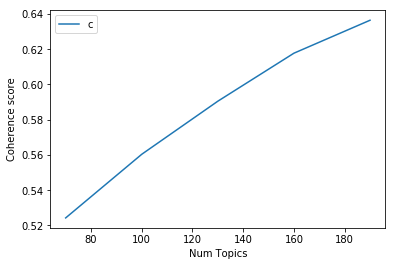

In [8]:
start=70
limit=200
step=30
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()